# San Joaquin Valley Township Individual Crops
This notebook performs the same ETL than the "San Joaquin Valley Township Crop Classes" `crops.ipynb` notebook  but extract the crops at the individual crop name (e.g. "strawberries", "potatoes", etc.) instead of the class (e.g. "D", "R", etc) level.

Related links:
* For the documentation about these datasets, their source, how to download them, and the features of interest, please refer to our [Crops Datasets](doc/assets/crops.md) documentation
* For the explanations on how the crom mapping datasets are overlaid with township boundaries to obtain the amount of land used for each crop type in each township, please refer to our [Overlaying San Joaquin Valley Township Boundaries](doc/etl/township_overlay.md) documentation



In [1]:
import matplotlib.pyplot as plt
from lib.crops import CropsDataset

Load the data by instantiating the CropsDataset class based on
* the geospatial map data for the years 2014, 2016 and 2018,
* the soil CSV dataset and the GeoJSON map data of the San Joaquin Valley

In [2]:
crops_dataset = CropsDataset()

Pre-process the crops dataset to keep only the selected features for the final analysis.

In [3]:
crops_dataset.preprocess_map_df(get_crops_details=True)

In [4]:
crops_dataset.map_df

,YEAR,CROP_TYPE,geometry
0,2016,D3,"POLYGON ((-119.51684 36.55406, -119.51469 36.5..."
1,2016,D12,"POLYGON ((-120.81485 37.41922, -120.81496 37.4..."
2,2016,D12,"POLYGON ((-119.28901 35.63797, -119.29464 35.6..."
3,2016,T20,"POLYGON ((-121.78678 36.71843, -121.78610 36.7..."
4,2016,YP,"POLYGON ((-121.80507 39.66605, -121.80506 39.6..."
...,...,...,...
798951,2018,P4,"POLYGON ((-120.90513 40.13510, -120.90503 40.1..."
798952,2018,P4,"POLYGON ((-120.87495 40.14633, -120.87445 40.1..."
798953,2018,P4,"POLYGON ((-120.93540 40.14685, -120.93581 40.1..."
798954,2018,V2,"POLYGON ((-121.94810 40.51928, -121.94915 40.5..."


Overlay the San Joaquin Valley township boundaries on the Crops dataset to cut the crops land areas with the township boundaries, thus extracting all the crops types per townships.

In [5]:
crops_dataset.overlay_township_boundries()

Display the map of the 2018 Crops dataset

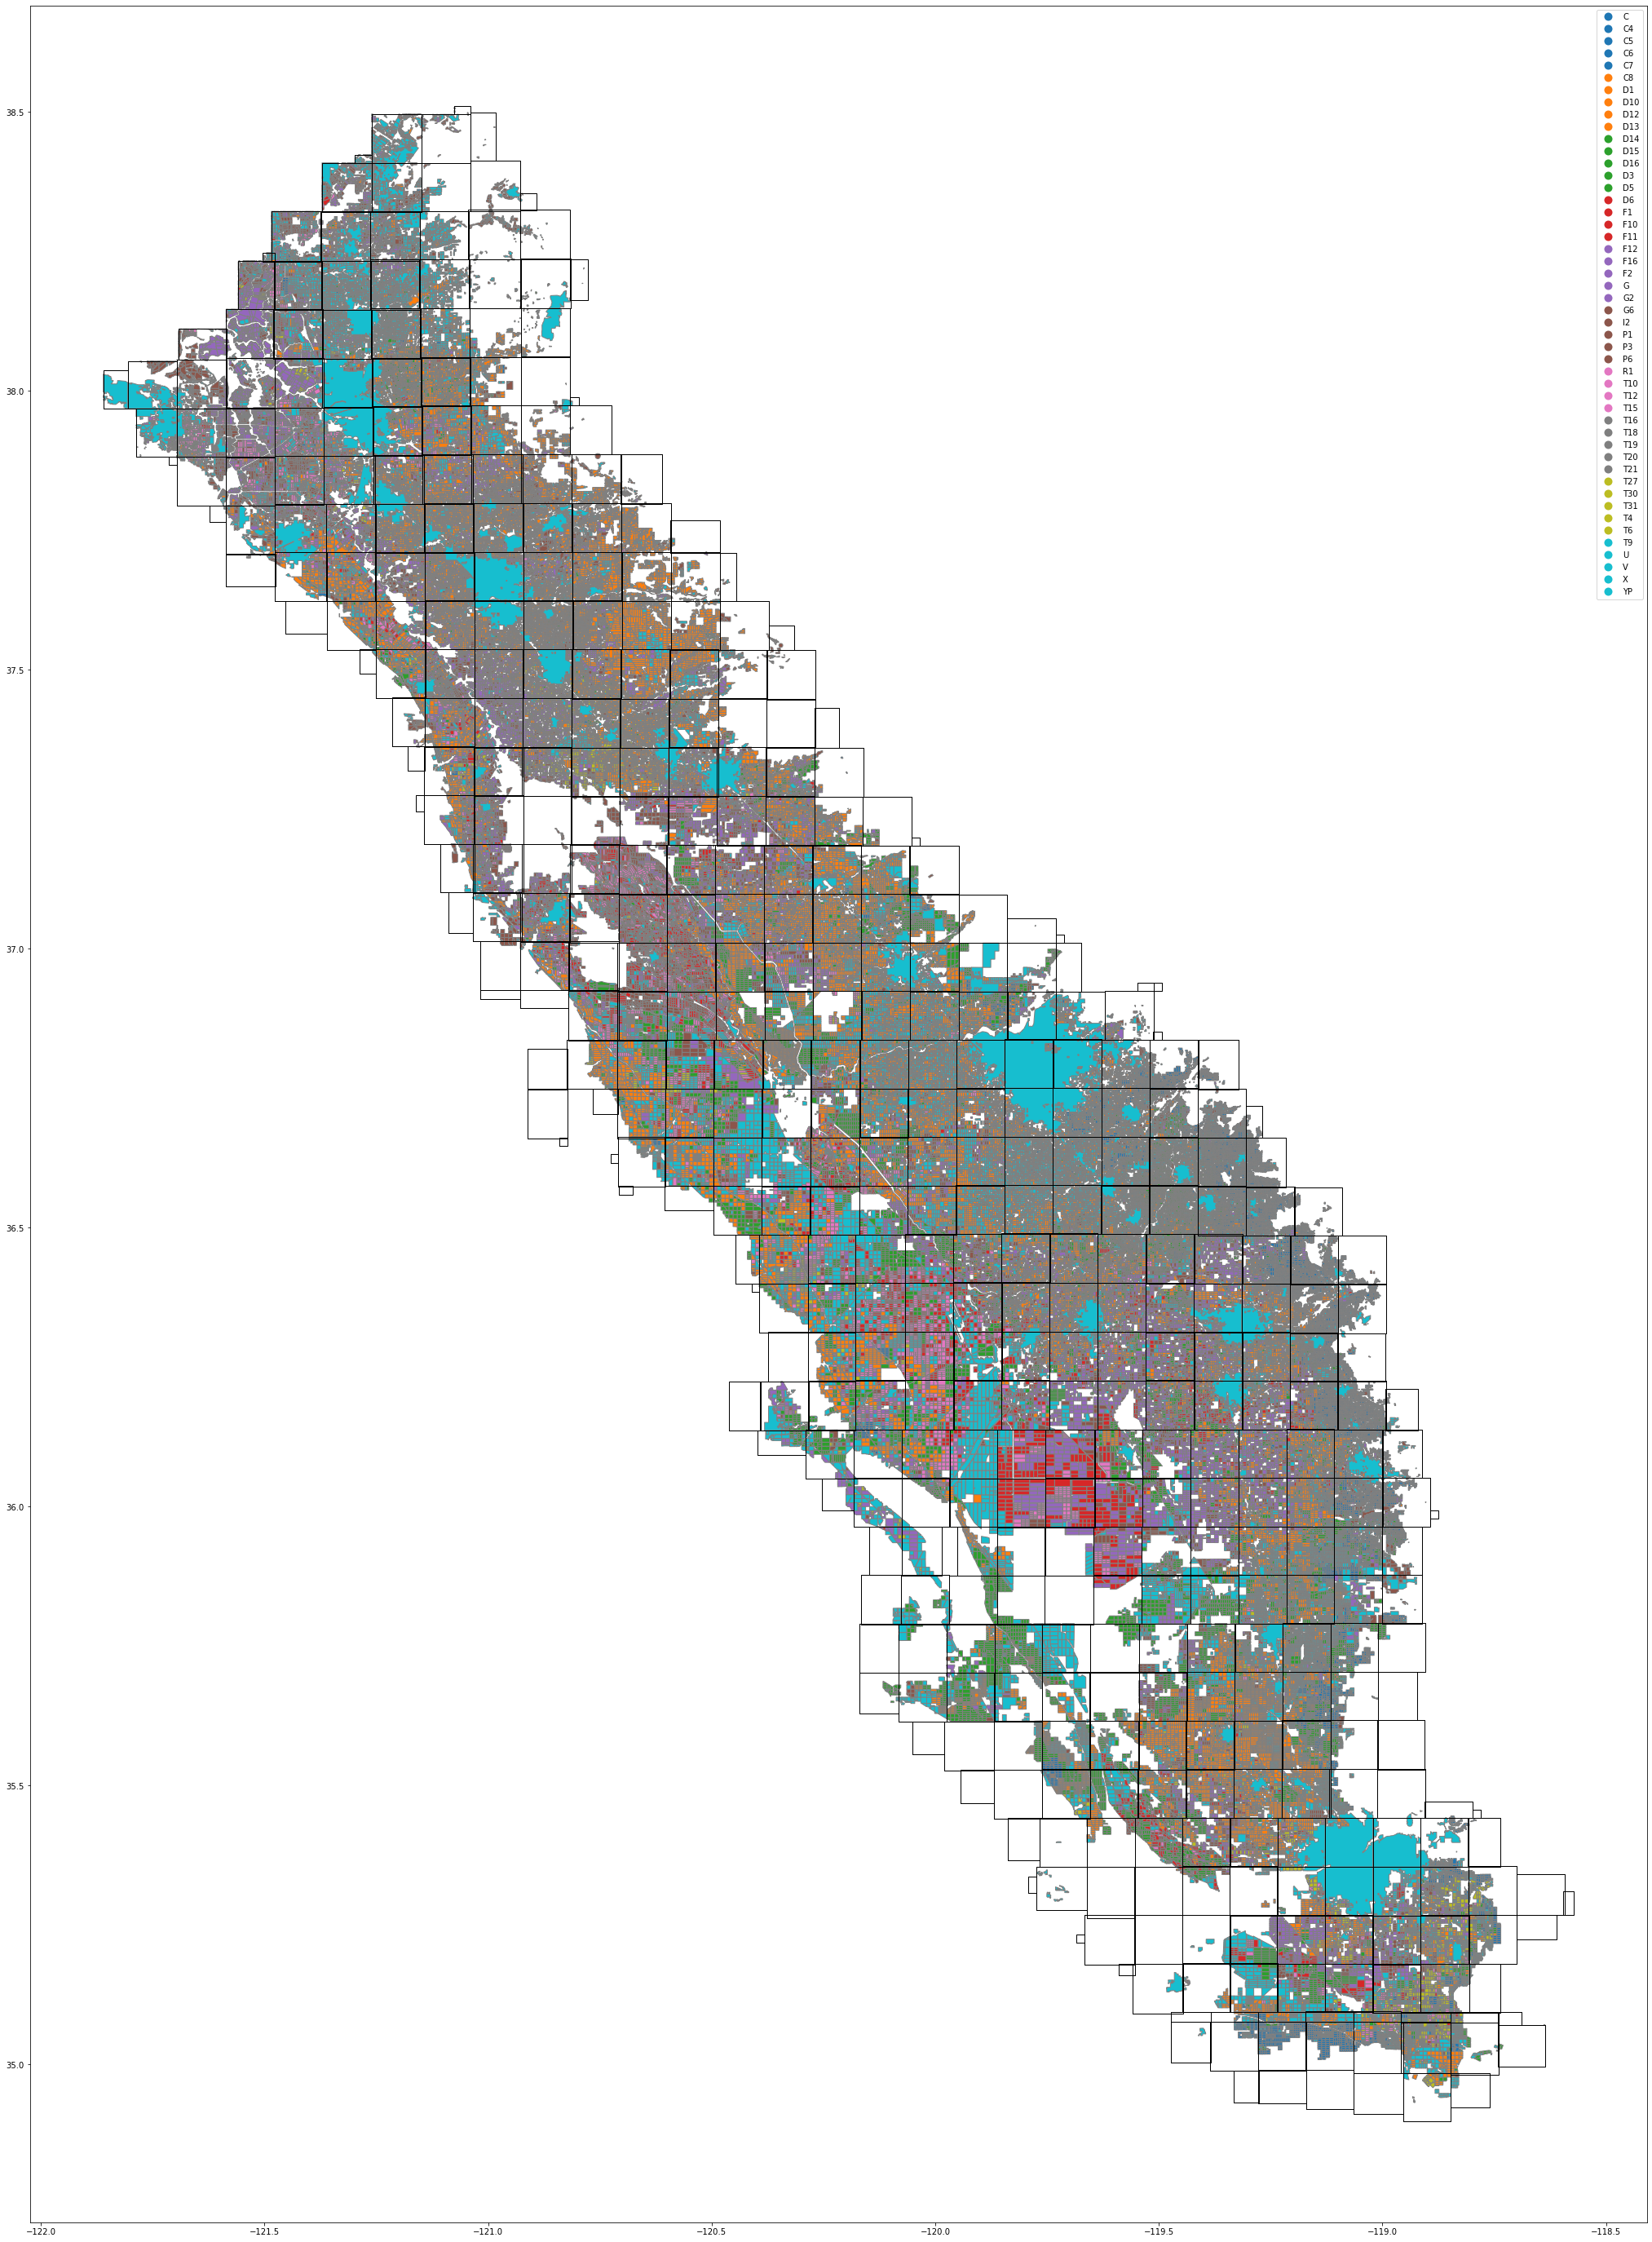

In [7]:
fig, ax = plt.subplots(figsize=(50,50))
crops_dataset.map_df[crops_dataset.map_df["YEAR"]=="2018"].plot(ax=ax, column="CROP_TYPE", edgecolor='grey', linewidth = 1, cmap=None, legend=True)
crops_dataset.sjv_township_range_df.plot(ax=ax, facecolor="none", edgecolor='black', linewidth = 1, cmap=None, legend=None)
plt.show()

The Crops datasets is further modified as follow:
1. Missing townships are filled with the "X - Unclassified" class from the Crops datasets to inlude them in the dataset.
2. Data for the year 2014 are used to fill the 2015 data, the 2016 for 2017 and the 2018 for the years 2019~.
3. The dataframe is then pivoted so that each `CROP_TYPE`becomes a feature
4. features matching the below criteria are dropped:
    * cover less than 5% of the land surface of every township for any given year
    * and `["X - Not Classified", "U - Urban", "NR - Native Riparian"]` classes are dropped

Note that the result of 1 and 4 is that the missing Township-Ranges will then be in the dataset with a land surface value of `0? for every type of crop.

In [8]:
crops_dataset.fill_missing_years()
crops_dataset.fill_townships_with_no_data(feature_to_fill="CROP_TYPE")
crops_dataset.compute_feature_at_township_level(feature_name="CROP_TYPE", feature_prefix="CROP")
crops_dataset.drop_features(drop_rate=0.05, unwanted_features=["CROP_X", "CROP_U", "CROP_NR"])

D:\code\jupyter_nb_data\UMSI\milestone2_waterwells_deepnote\lib\wsdatasets.py:187: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  self.map_df = new_map_df


In [12]:
crops_dataset.output_df

,TOWNSHIP,YEAR,CROP_C,CROP_C6,CROP_D10,CROP_D12,CROP_D13,CROP_D14,CROP_D15,CROP_D16,...,CROP_T19,CROP_T21,CROP_T30,CROP_T31,CROP_T4,CROP_T6,CROP_T8,CROP_T9,CROP_V,CROP_YP
0,T01N R02E,2015,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,T01N R02E,2016,0.0,0.004968,0.001727,0.000000,0.005213,0.003097,0.000704,0.000791,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.004871,0.003288,0.000076
2,T01N R02E,2017,0.0,0.004968,0.001727,0.000000,0.005213,0.003097,0.000704,0.000791,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.004871,0.003288,0.000076
3,T01N R02E,2018,0.0,0.005107,0.001336,0.000000,0.001999,0.003082,0.000689,0.000612,...,0.0,0.001492,0.0,0.0,0.0,0.0,0.0,0.002400,0.003803,0.004345
4,T01N R02E,2019,0.0,0.005107,0.001336,0.000000,0.001999,0.003082,0.000689,0.000612,...,0.0,0.001492,0.0,0.0,0.0,0.0,0.0,0.002400,0.003803,0.004345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3341,T32S R30E,2017,0.0,0.000000,0.000000,0.005775,0.000000,0.009753,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.165038,0.000000
3342,T32S R30E,2018,0.0,0.000000,0.000000,0.005819,0.000000,0.009829,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.703482,0.000000
3343,T32S R30E,2019,0.0,0.000000,0.000000,0.005819,0.000000,0.009829,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.703482,0.000000
3344,T32S R30E,2020,0.0,0.000000,0.000000,0.005819,0.000000,0.009829,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.703482,0.000000


In [13]:
crops_dataset.output_df.to_csv("../assets/outputs/crops_detailed.csv")